011


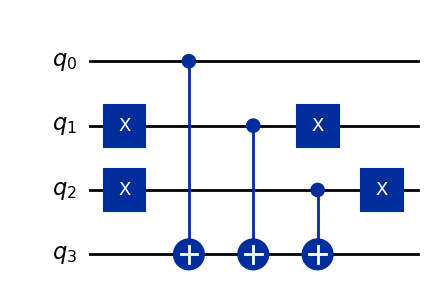

In [14]:
from qiskit import QuantumCircuit 
import numpy as np
n = 3
oracle_qc = QuantumCircuit(n+1)
b = 3
b_str = format(b, '0'+str(n)+'b')
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle_qc.x(qubit)
for qubit in range(n):
    oracle_qc.cx(qubit, n)
for qubit in range(len(b_str)):
     if b_str[qubit] == '1':
        oracle_qc.x(qubit)
         
print(b_str)
oracle_qc.draw(output='mpl',filename='qc2.png')#获得png图片


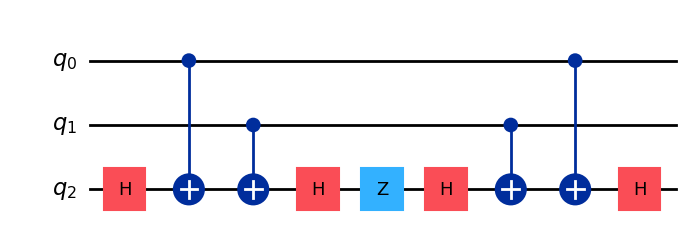

In [19]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SGate, HGate, XGate, ZGate, CXGate

def ccz_gate(cq, tq, circuit):

    # 添加辅助量子比特
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(ZGate(), [tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(HGate(), [tq], [])
    
# 创建一个量子电路
qc = QuantumCircuit(3)  

# 定义控制位和目标位
control_qubits = [0, 1]
target_qubit = 2

# 添加双控制位的 CZ 门
ccz_gate(control_qubits, target_qubit, qc)

# 绘制电路
qc.draw(output='mpl',filename='ccz.png')

In [21]:
from qiskit import QuantumCircuit
import numpy as np

# 定义 iI 操作的矩阵
iI_matrix = np.array([[1j, 0,] ,
                      [0, 1j, ],])

# 创建量子电路
qc = QuantumCircuit(1)

# 在电路中添加 iI 操作
qc.unitary(iI_matrix, 0, label='iI')

# 绘制电路
qc.draw(output='text')


┌────┐
q: ┤ iI ├
   └────┘

In [23]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SGate, HGate, XGate, ZGate, CXGate

def ccz_gate(cq, tq, circuit):

    # 添加辅助量子比特
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(ZGate(), [tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(HGate(), [tq], [])
ccz_circuit = QuantumCircuit(3)
control_qubits = [0, 1]
target_qubit = 2

# 在电路中实现 CCZ 门
ccz_gate(control_qubits, target_qubit, ccz_circuit)

# 将电路转换为自定义门
ccz_gate_def = ccz_circuit.to_gate()
ccz_gate_def.name = "CCZ"  # 设置自定义门的名称

# 创建一个新的量子电路
qc = QuantumCircuit(3)

# 直接使用自定义的 CCZ 门
qc.append(ccz_gate_def, [0, 1, 2], [])

# 绘制电路
qc.draw(output='text')



┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1 CCZ ├
     │      │
q_2: ┤2     ├
     └──────┘

In [36]:
#实现CCZ门
def ccz_gate(cq, tq, circuit):

    # 添加辅助量子比特
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(ZGate(), [tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(HGate(), [tq], [])
#实现U0
def U0_gate(q, circuit):
    # 定义 U0 操作
    U0_matrix = np.diag([1, -1, -1, -1, -1, -1, -1, -1])
    # 在电路中添加 iI 操作
    circuit.unitary(U0_matrix, q, label='U0')
    
#引入库
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import SGate, HGate, XGate, ZGate, CXGate
from qiskit_aer import Aer
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
#CCZ封装
ccz_circuit = QuantumCircuit(3)
control_qubits = [0, 1]
target_qubit = 2
ccz_gate(control_qubits, target_qubit, ccz_circuit)

# 将电路转换为自定义门
ccz_gate_def = ccz_circuit.to_gate()
ccz_gate_def.name = "CCZ"  # 设置自定义门的名称


#实现G算符
n = 3
G_circuit = QuantumCircuit(n)

#添加CCZ门    
G_circuit.append(ccz_gate_def, [0, 1, 2])
#添加Upsi
for q in [0,1,2]:
    G_circuit.h(q)
    
U0_gate([0,1,2],G_circuit)

for q in [0,1,2]:
    G_circuit.h(q)


G_circuit.draw(output='text')


┌──────┐┌───┐┌─────┐┌───┐
q_0: ┤0     ├┤ H ├┤0    ├┤ H ├
     │      │├───┤│     │├───┤
q_1: ┤1 CCZ ├┤ H ├┤1 U0 ├┤ H ├
     │      │├───┤│     │├───┤
q_2: ┤2     ├┤ H ├┤2    ├┤ H ├
     └──────┘└───┘└─────┘└───┘

In [ ]:
# 将电路转换为自定义门
G_gate_def = G_circuit.to_gate()
G_gate_def.name = "G"  # 设置自定义门的名称

#grover算法量子线路
grover_circuit = QuantumCircuit(n,n)
for q in [0,1,2]:
    grover_circuit.h(q)
grover_circuit.append(G_gate_def, [0, 1, 2])
grover_circuit.draw(output='mpl',filename='grover_circuit.png')
grover_circuit.measure([0, 1, 2], [0, 1, 2])  # 测量所有量子比特

#模拟器运行
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
result = aer_sim.run(transpiled_grover_circuit).result()
counts = result.get_counts(grover_circuit)
plot_histogram(counts)

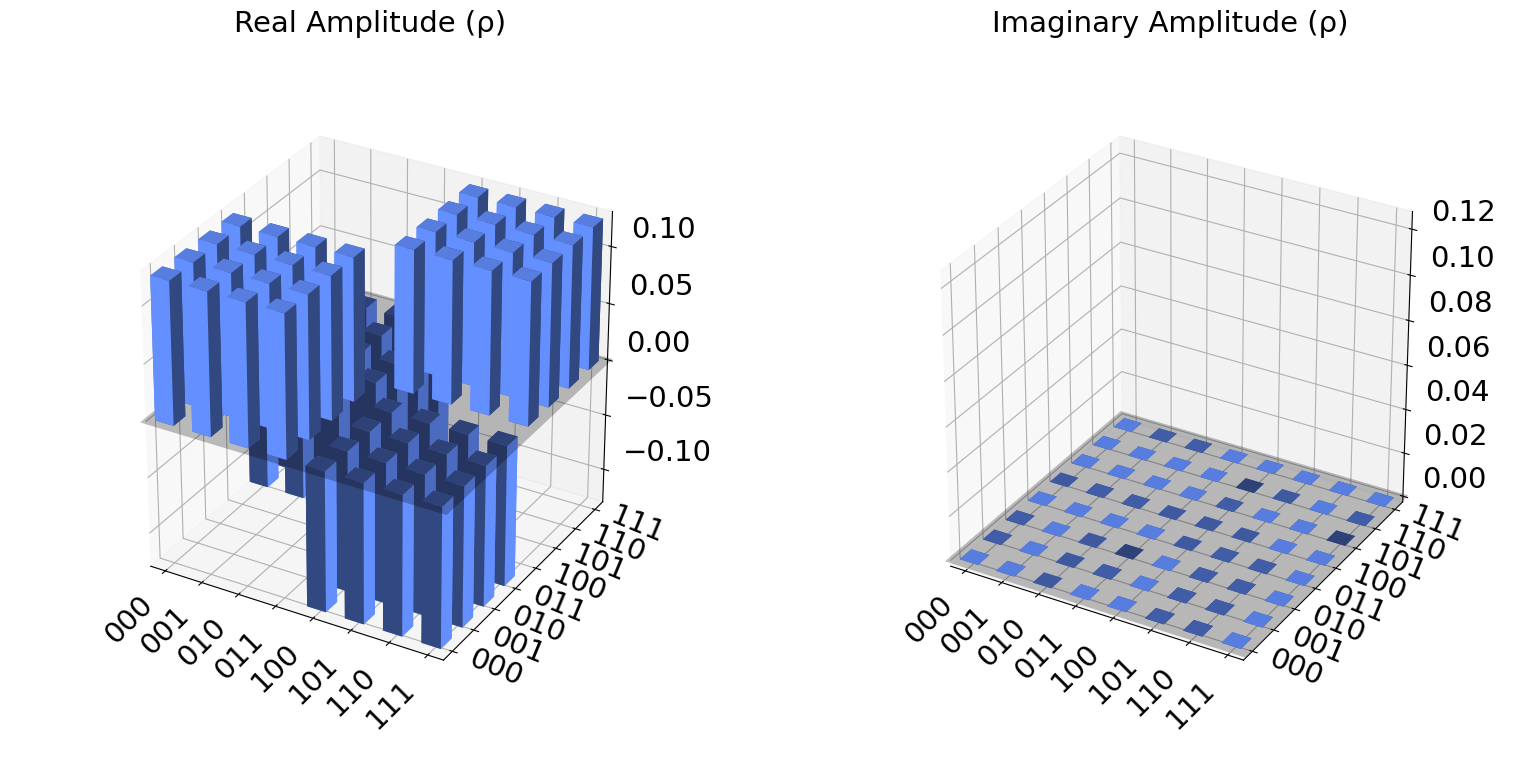

In [51]:
#实现CCZ门
def ccz_gate(cq, tq, circuit):

    # 添加辅助量子比特
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(ZGate(), [tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(HGate(), [tq], [])
#实现iI
def iI_gate(q, circuit):
    # 定义 iI 操作
    iI_matrix = np.array([[1j, 0,] ,
                          [0, 1j, ],])
    # 在电路中添加 iI 操作
    circuit.unitary(iI_matrix, q, label='iI')
    
#引入库
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import SGate, HGate, XGate, ZGate, CXGate
from qiskit_aer import Aer
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
#CCZ封装
ccz_circuit = QuantumCircuit(3,3)
for q in [0,1,2]:
    ccz_circuit.h(q)
control_qubits = [0, 1]
target_qubit = 2
ccz_gate(control_qubits, target_qubit, ccz_circuit)

ccz_circuit.draw(output='text')


#模拟器运行
aer_sim = Aer.get_backend('statevector_simulator')
transpiled_ccz_circuit = transpile(ccz_circuit, aer_sim)
result = aer_sim.run(transpiled_ccz_circuit).result()

# 获取状态向量
statevector = result.get_statevector(ccz_circuit)

#可视化
plot_state_city(statevector)

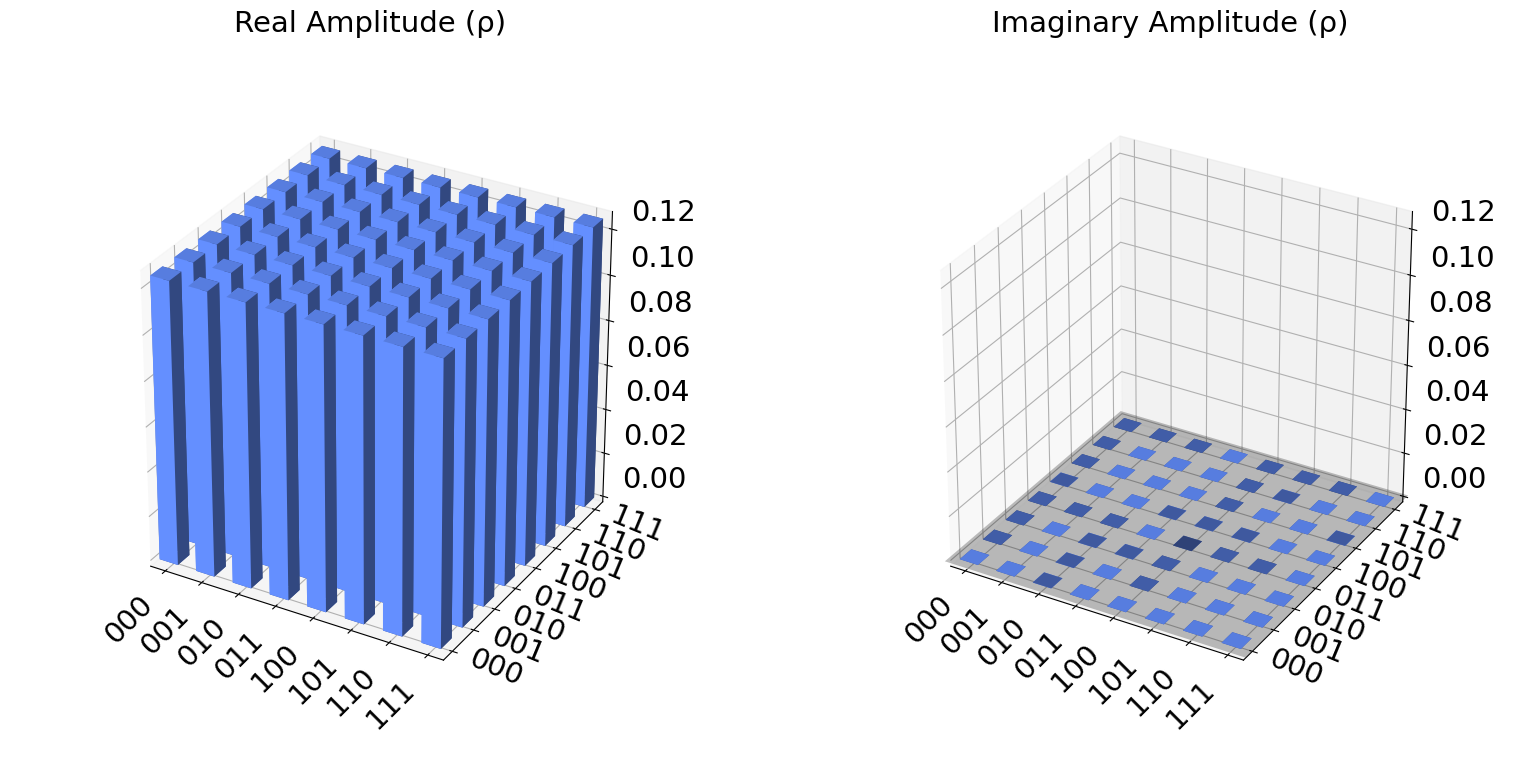

In [56]:
#实现CCZ门
def ccz_gate(cq, tq, circuit):

    # 添加辅助量子比特
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(ZGate(), [tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(HGate(), [tq], [])
#实现U0
def U0_gate(q, circuit):
    # 定义 U0 操作
    U0_matrix = np.diag([1, -1, -1, -1, -1, -1, -1, -1])
    # 在电路中添加 iI 操作
    circuit.unitary(U0_matrix, q, label='U0')
    
#引入库
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import SGate, HGate, XGate, ZGate, CXGate
from qiskit_aer import Aer
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
#CCZ封装
ccz_circuit = QuantumCircuit(3)
control_qubits = [0, 1]
target_qubit = 2
ccz_gate(control_qubits, target_qubit, ccz_circuit)

# 将电路转换为自定义门
ccz_gate_def = ccz_circuit.to_gate()
ccz_gate_def.name = "CCZ"  # 设置自定义门的名称


#实现G算符
n = 3
G_circuit = QuantumCircuit(n)

#添加CCZ门    
G_circuit.append(ccz_gate_def, [0, 1, 2])
#添加Upsi
for q in [0,1,2]:
    G_circuit.h(q)
    
U0_gate([0,1,2],G_circuit)

for q in [0,1,2]:
    G_circuit.h(q)

# 将电路转换为自定义门
G_gate_def = G_circuit.to_gate()
G_gate_def.name = "G"  # 设置自定义门的名称

#grover算法量子线路
grover_circuit = QuantumCircuit(n,n)
for q in [0,1,2]:
    grover_circuit.h(q)
grover_circuit.append(G_gate_def, [0, 1, 2])
grover_circuit.append(G_gate_def, [0, 1, 2])
grover_circuit.append(G_gate_def, [0, 1, 2])
grover_circuit.append(G_gate_def, [0, 1, 2])
#模拟器运行
aer_sim = Aer.get_backend('statevector_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
result = aer_sim.run(transpiled_grover_circuit).result()

# 获取状态向量
statevector = result.get_statevector(grover_circuit)

#可视化
plot_state_city(statevector)


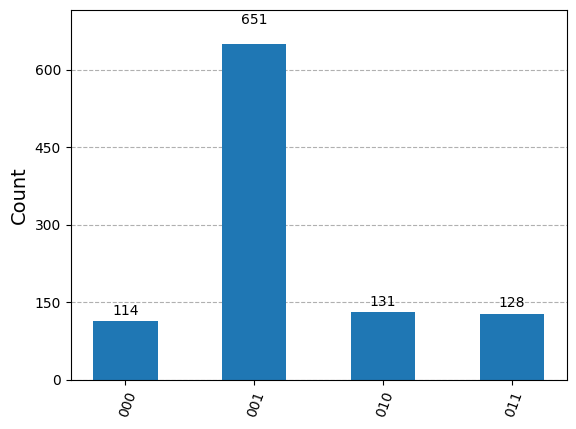

In [5]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# 定义 Oracle
def oracle(circuit, qubits, target_state):
    # 标记目标状态 |101>
    circuit.x(qubits[1])
    circuit.ccx(qubits[0], qubits[1], qubits[2])
    circuit.x(qubits[1])

# 定义扩散算子
def diffusion_operator(circuit, qubits):
    for qubit in qubits:
        circuit.h(qubit)
        circuit.x(qubit)
    circuit.ccx(qubits[0], qubits[1], qubits[2])
    for qubit in qubits:
        circuit.x(qubit)
        circuit.h(qubit)

# 创建 Grover 电路
n = 3
grover_circuit = QuantumCircuit(n, n)

# 初始化量子比特
for qubit in range(n):
    grover_circuit.h(qubit)

# 应用 Oracle 和扩散算子
num_iterations = int(np.pi / 4 * np.sqrt(2**n))  # Grover 迭代次数
for _ in range(num_iterations):
    oracle(grover_circuit, [0, 1, 2], '101')
    diffusion_operator(grover_circuit, [0, 1, 2])

# 测量
grover_circuit.measure([0, 1],[0, 1])

# 绘制电路
grover_circuit.draw(output='mpl', filename='grover_circuit.png')

# 模拟器运行
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
result = aer_sim.run(transpiled_grover_circuit).result()
counts = result.get_counts(grover_circuit)

# 绘制直方图
plot_histogram(counts)

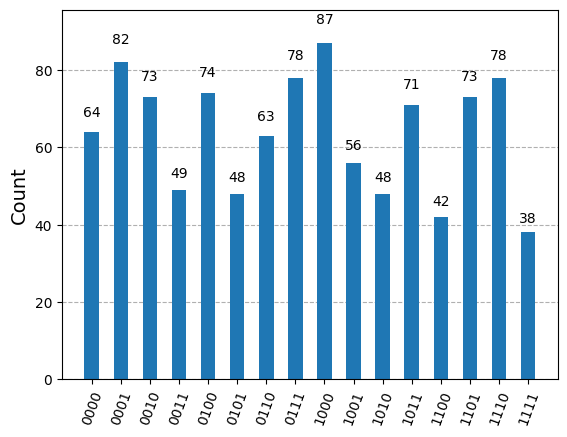

In [13]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import MCXGate
from qiskit.visualization import plot_histogram

# 定义 Oracle
def create_oracle():
    oracle = QuantumCircuit(5)
    oracle.append(MCXGate(4), list(range(4)) + [4])  # 控制位为前 4 个量子比特，目标位为辅助量子比特
    return oracle

# 定义扩散算子
def create_diffusion_operator():
    diffusion = QuantumCircuit(5)
    diffusion.h(range(4))  # 对前 4 个量子比特应用 Hadamard 门
    diffusion.append(MCXGate(4), list(range(4)) + [4])  # 使用多控制非门
    diffusion.h(range(4))  # 再次应用 Hadamard 门
    return diffusion

# 创建 Oracle 和扩散算子
oracle = create_oracle()
diffusion = create_diffusion_operator()

# 创建 Grover 算法的量子线路
n = 4  # 4 个量子比特
grover_circuit = QuantumCircuit(5, 4)  # 5 个量子比特（4 个控制位 + 1 个辅助位），4 个经典比特用于测量

# 初始化量子比特
grover_circuit.h(range(4))  # 对前 4 个量子比特应用 Hadamard 门

# 应用 Oracle 和扩散算子多次
num_iterations = 2  # 根据问题规模选择迭代次数
for _ in range(num_iterations):
    grover_circuit.append(oracle, range(5))  # 应用 Oracle
    grover_circuit.append(diffusion, range(5))  # 应用扩散算子

# 测量前 4 个量子比特
grover_circuit.measure(range(4), range(4))

# 绘制电路
grover_circuit.draw(output='text')

# 模拟器运行
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(grover_circuit, aer_sim)
result = aer_sim.run(transpiled_circuit).result()
counts = result.get_counts(grover_circuit)

# 绘制直方图
plot_histogram(counts)

In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate



# 创建 Oracle，标记状态 |1111>
def create_oracle(circuit, control_qubits, target_qubit):
    # 添加辅助量子比特
    circuit.x(target_qubit)  # 翻转目标量子比特
    circuit.append(MCXGate(), control_qubits + [target_qubit])  # 应用多控制非门
    circuit.x(target_qubit)  # 再次翻转目标量子比特

# 创建扩散算子
def create_diffusion_operator(circuit, num_qubits):
    # 应用 Hadamard 门
    circuit.h(range(num_qubits))
    # 应用多控制非门，标记 |0...0⟩ 状态
    circuit.append(MCXGate(num_qubits), range(num_qubits))
    # 再次应用 Hadamard 门
    circuit.h(range(num_qubits))
    # 应用 X 门和 Z 门
    for qubit in range(num_qubits):
        circuit.x(qubit)
    circuit.append(MCXGate(num_qubits), range(num_qubits))
    for qubit in range(num_qubits):
        circuit.z(qubit)
        circuit.x(qubit)

# 创建 Grover 算法的量子线路
n = 4  # 4 个量子比特
grover_circuit = QuantumCircuit(n, n)

# 初始化量子比特
for qubit in range(n):
    grover_circuit.h(qubit)

# 添加 Oracle
control_qubits = [0, 1, 2]
target_qubit = 3
create_oracle(grover_circuit, control_qubits, target_qubit)

# 添加扩散算子
create_diffusion_operator(grover_circuit, n)

# 应用 Oracle 和扩散算子多次
num_iterations = 2  # 根据问题规模选择迭代次数
for _ in range(num_iterations):
    grover_circuit.append(create_oracle(control_qubits, target_qubit), range(n))
    grover_circuit.append(create_diffusion_operator(QuantumCircuit(n), n), range(n))

# 测量所有量子比特
grover_circuit.measure(range(n), range(n))

# 绘制电路
grover_circuit.draw(output='text')

# 模拟器运行
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(grover_circuit, aer_sim)
result = aer_sim.run(transpiled_circuit).result()
counts = result.get_counts()

# 绘制直方图
plot_histogram(counts)

TypeError: __init__() missing 1 required positional argument: 'num_ctrl_qubits'